In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import time
import random

In [2]:
train = pd.read_csv('../data/train_xy.csv')
train.shape

(15000, 160)

In [3]:
test = pd.read_csv('../data/train_x.csv')
test.shape

(10000, 159)

In [4]:
x_train = train.drop(['cust_id','cust_group','y'],axis=1)
x_train.shape

(15000, 157)

In [5]:
x_test = test.drop(['cust_id','cust_group'],axis=1)
x_test.shape

(10000, 157)

In [6]:
# iv_feature = ['x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9', 'x_10', 'x_11', 'x_12', 'x_13', 'x_14', 'x_15', 'x_16', 'x_17', 'x_18', 'x_19', 'x_20', 'x_21', 'x_22', 'x_23', 'x_24', 'x_25', 'x_26', 'x_27', 'x_28', 'x_29', 'x_30', 'x_31', 'x_32', 'x_33', 'x_34', 'x_35', 'x_36', 'x_37', 'x_38', 'x_39', 'x_40', 'x_41', 'x_42', 'x_43', 'x_44', 'x_45', 'x_46', 'x_47', 'x_48', 'x_50', 'x_51', 'x_52', 'x_53', 'x_54', 'x_55', 'x_56', 'x_57', 'x_58', 'x_59', 'x_60', 'x_61', 'x_62', 'x_63', 'x_64', 'x_65', 'x_66', 'x_67', 'x_68', 'x_69', 'x_70', 'x_71', 'x_72', 'x_73', 'x_74', 'x_75', 'x_76', 'x_77', 'x_78', 'x_79', 'x_80', 'x_81', 'x_82', 'x_83', 'x_84', 'x_85', 'x_86', 'x_87', 'x_88', 'x_90', 'x_97', 'x_98', 'x_99', 'x_100', 'x_101', 'x_139', 'x_140', 'x_141', 'x_142', 'x_143', 'x_144', 'x_149', 'x_150', 'x_153', 'x_154', 'x_155', 'x_157']
# x_train = train[iv_feature]
# x_train.shape

In [8]:
# iv_feature = ['x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9', 'x_10', 'x_11', 'x_12', 'x_13', 'x_14', 'x_15', 'x_16', 'x_17', 'x_18', 'x_19', 'x_20', 'x_21', 'x_22', 'x_23', 'x_24', 'x_25', 'x_26', 'x_27', 'x_28', 'x_29', 'x_30', 'x_31', 'x_32', 'x_33', 'x_34', 'x_35', 'x_36', 'x_37', 'x_38', 'x_39', 'x_40', 'x_41', 'x_42', 'x_43', 'x_44', 'x_45', 'x_46', 'x_47', 'x_48', 'x_50', 'x_51', 'x_52', 'x_53', 'x_54', 'x_55', 'x_56', 'x_57', 'x_58', 'x_59', 'x_60', 'x_61', 'x_62', 'x_63', 'x_64', 'x_65', 'x_66', 'x_67', 'x_68', 'x_69', 'x_70', 'x_71', 'x_72', 'x_73', 'x_74', 'x_75', 'x_76', 'x_77', 'x_78', 'x_79', 'x_80', 'x_81', 'x_82', 'x_83', 'x_84', 'x_85', 'x_86', 'x_87', 'x_88', 'x_90', 'x_97', 'x_98', 'x_99', 'x_100', 'x_101', 'x_139', 'x_140', 'x_141', 'x_142', 'x_143', 'x_144', 'x_149', 'x_150', 'x_153', 'x_154', 'x_155', 'x_157']
# x_test = test[iv_feature]
# x_test.shape

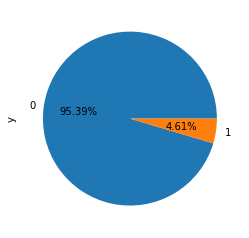

In [9]:
train['y'].value_counts().plot.pie(autopct = '%1.2f%%')

In [10]:
x = pd.concat([x_train,x_test])
x.shape

(25000, 157)

In [11]:
Y_train = train['y']

In [12]:
for i in range(96,158):
    col = 'x'+'_'+str(i)
    if col in x.columns.values:
        dummies_df = pd.get_dummies(x[col]).rename(columns=lambda x: col + str(x))
        x = pd.concat([x, dummies_df], axis=1)

In [13]:
train_X = x[0:15000]
test_X = x[15000:25000]
print(train_X.shape)
print(test_X.shape)

(15000, 361)
(10000, 361)


In [14]:
from keras.models import Model #泛型模型
from keras.layers import Dense, Input
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split

Using TensorFlow backend.
C:\Program Files\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [15]:
def split_data(data_):
    idx_1 = data_[data_['label']==0].index
    idx_2 = data_[data_['label']==1].index
    nb_1 = len(data_.loc[idx_1])
    nb_2 = len(data_.loc[idx_2])
#     print(nb_1)
#     print(nb_2)
    idx_list_1 = list(idx_1)
    idx_list_2 = list(idx_2)
    train_x1 = data_.loc[idx_list_1]
    train_x2 = data_.loc[idx_list_2]
#     print(train_x1.shape)
#     print(train_x2.shape)
    return train_x1,train_x2

In [16]:
def resample_data(data, number):
    idx_1 = data.index
    nb_1 = len(idx_1)
#     print(nb_1)
#     number = int(nb_1 * rate)
    idx_1_sub = np.random.choice(idx_1, number)
#     print(idx_1_sub)
    nb_2 = len(data.loc[idx_1_sub])
#     print(nb_2)
    idx_list_1 = list(idx_1_sub)
    train_1 = data.loc[idx_1_sub]
#     print(train_1.shape)
    return train_1

In [48]:
X_train,X_val,y_train,y_val= train_test_split(train_X,Y_train,test_size=0.2,random_state=2)
print(X_train.shape)

(12000, 361)


In [18]:
xx = X_train
xx['label'] = y_train

xx.shape

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


(12000, 362)

In [19]:
train_x1, train_x2 = split_data(xx)
print(train_x1.shape)
print(train_x2.shape)

(11442, 362)
(558, 362)


In [20]:
train_data = resample_data(train_x1, 10000)
print(train_data.shape)

(10000, 362)


In [21]:
train_data = train_x1.drop(['label'],axis=1)
train_data.shape

(11442, 361)

In [22]:
train_data1 = train_x2.drop(['label'],axis=1)
train_data1.shape

(558, 361)

In [23]:
train_data.head()

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,...,x_1561,x_1562,x_1563,x_157-99,x_1571,x_1572,x_1573,x_1574,x_15710,x_15711
1154,0.291667,0.389913,0,0,0,0,3,2,0,0,...,1,0,0,0,0,0,0,1,0,0
7919,0.083333,0.491195,-99,-99,-99,-99,-99,-99,-99,-99,...,0,1,0,1,0,0,0,0,0,0
4854,0.291667,0.361088,-99,-99,-99,-99,-99,-99,-99,-99,...,0,0,0,1,0,0,0,0,0,0
5947,0.250000,0.272055,0,0,0,0,2,2,0,0,...,0,1,0,1,0,0,0,0,0,0
10536,0.458333,0.519782,0,0,0,0,1,1,0,0,...,0,1,0,0,0,1,0,0,0,0


In [35]:
# 压缩特征维度至2维
encoding_dim = 260
 
# this is our input placeholder
input_img = Input(shape=(361,))
 
# 编码层
encoded = Dense(361, activation='relu')(input_img)
# encoded = Dense(64, activation='relu')(encoded)
# encoded = Dense(32, activation='relu')(encoded)
encoder_output = Dense(encoding_dim)(encoded)

# 解码层
decoded = Dense(300, activation='relu')(encoder_output)
# decoded = Dense(64, activation='relu')(decoded)
# decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(361, activation='tanh')(decoded)
 
# 构建自编码模型
autoencoder = Model(inputs=input_img, outputs=decoded)
 
# 构建编码模型
encoder = Model(inputs=input_img, outputs=encoder_output)
 
# compile autoencoder
autoencoder.compile(optimizer='adam', loss='mse')

# training
autoencoder.fit(train_data1.values, train_data1.values, epochs=200, batch_size=64, shuffle=True)

Epoch 1/200
558/558 [==============================] - 1s 920us/step - loss: 1499.6892
Epoch 2/200
558/558 [==============================] - 0s 235us/step - loss: 1490.3059
Epoch 3/200
558/558 [==============================] - 0s 267us/step - loss: 1487.4792
Epoch 4/200
558/558 [==============================] - 0s 247us/step - loss: 1486.0535
Epoch 5/200
558/558 [==============================] - 0s 267us/step - loss: 1486.0507
Epoch 6/200
558/558 [==============================] - 0s 269us/step - loss: 1485.9172
Epoch 7/200
558/558 [==============================] - 0s 260us/step - loss: 1485.6946
Epoch 8/200
558/558 [==============================] - 0s 265us/step - loss: 1485.6937
Epoch 9/200
558/558 [==============================] - 0s 265us/step - loss: 1485.6878
Epoch 10/200
558/558 [==============================] - 0s 262us/step - loss: 1485.6806
Epoch 11/200
558/558 [==============================] - 0s 269us/step - loss: 1485.6798
Epoch 12/200
558/558 [===================

In [36]:
aa = train_data.iloc[0:100,:]

In [37]:
aaa = train_data1.iloc[0:100,:]

In [45]:
bb = encoder.predict(aa.values)

In [47]:
bb.shape

(100, 260)

In [39]:
bbb = autoencoder.predict(aaa.values)

In [40]:
bb.shape

(100, 361)

In [41]:
bb[0].shape

(361,)

In [42]:
aa.values[0].shape

(361,)

In [43]:
from sklearn.metrics import mean_squared_error
for i in range(100):
    print(mean_squared_error(aa.values[i], bb[i]))

1069.034182509594
2054.2862094703655
2162.0781682997713
1199.3218567466263
1146.4164646823294
1070.7083496728608
1576.729007162186
1172.9181144647812
1552.0607394594304
1629.1869839558112
1146.2891124813134
1147.4630085070835
1146.4278456249792
1042.3355124994591
2108.12884113931
1147.2681690446348
2029.3422053377176
2081.3851971730346
1629.833804541598
2107.1884192519806
2002.9040749764831
1147.586923475177
1147.3034930531148
1069.2094798931018
1125.6720281707464
1044.0733749352507
1149.3195599228995
2160.2856295186652
1068.2616787009306
2107.4678520267485
2109.197127059287
1628.5588355152206
2160.027000335839
1147.7319646925619
1550.1689840646686
1097.4933170790378
2160.1642041145037
1122.488146003726
2133.737084374556
2030.0258308765985
1121.3075427817278
2188.220499536656
1175.0532832122904
1632.4773556437817
2081.8980302324117
2027.8887416207067
1147.231828751506
2107.672251324085
2107.063320006637
2108.4772783829058
2107.191412469513
1252.874251046101
2002.765398822956
2133.66527

In [44]:
for i in range(100):
    print(mean_squared_error(aaa.values[i], bbb[i]))

1173.017262410767
1200.5509244814689
2133.9077799397287
1146.4980670982798
2187.0571106492175
1226.9692953738358
1147.1788504828962
1122.923050200922
1147.6516246144436
1146.5705592517995
1631.1805968152544
1199.4304022961167
2108.286571309914
2160.2413809136
1546.4366418922245
1069.7359271394707
2030.2591719873224
1146.2158570865022
2107.302532767192
2160.225005922525
1199.7010973468762
1044.1568076376823
1252.3874796358682
1280.1152451547473
1147.1115793165268
1629.7169543084233
2133.9423257955877
1252.4896796095616
1147.8477053268855
1149.6006534848918
1226.6202009263184
1175.9745336460912
1148.1025241692835
1122.22440041552
1226.0619836077062
1226.7494728256906
1227.2644958881663
1173.3408505243674
2107.3143713912823
1227.0367365977065
1627.5147629162886
1149.2449899033945
1147.6866202009119
1172.912896536208
1120.267342989637
1120.4517422451604
3286.9159535355484
1200.2074206956947
1200.1910001599506
2186.9532407851148
1173.053490043315
1147.702068304333
1631.8352358781383
2108.29